In [137]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('./computer_vision/fig/fig/cat.bmp')

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)

while True:
    key = cv2.waitKey()
    if key == 27:
        break
        
cv2.destroyAllWindows()

In [2]:
import os

In [3]:
img_lists = os.listdir('./computer_vision/fig/jerry/')
# print('img_lists')

img_path = []
for i in img_lists:
    img_name = './computer_vision/fig/jerry/'+i
    img_path.append(img_name)

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(img_path[idx])
    
    if img is None:
        print('image read failed')
        break
        
    cv2.imshow('scene', img)
    
    if cv2.waitKey(300) == 27:
        break
    idx +=1
    
    if idx >= len(img_path):
        idx = 0
cv2.destroyAllWindows()

In [3]:
src = cv2.imread('./computer_vision/fig/fig/airplane.bmp')
mask = cv2.imread('./computer_vision/fig/fig/mask_plane.bmp')
dst = cv2.imread('./computer_vision/fig/fig/field.bmp')

cv2.copyTo(src, mask, dst)

cv2.imshow('src',src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()


In [8]:
img = np.full((600,1200,3), 255, np.uint8)

cv2.line(img, (50,50), (200,50),(0,0,255), 3)
cv2.arrowedLine(img, (200,50), (200,200),(255,0,255), 3)
cv2.rectangle(img, (50,300), (100,400),(255,0,0), -1)
cv2.rectangle(img, (50,300,100,400),(0,0,255), 4)
cv2.circle(img, (500, 300), 100, (0,255,255), 3, cv2.LINE_AA)
cv2.putText(img, 'Opencv', (500,300), cv2.FONT_HERSHEY_COMPLEX,
           1,(0,255,0),2, cv2.LINE_AA)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame open failed')
        break
    
    out.write(frame)
    cv2.imshow('img', frame)
    
    if cv2.waitKey(30) == 27:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()

In [4]:
def call_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('left button down', x,y)

img = np.ones((500,600,3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)


cv2.waitKey()
cv2.destroyAllWindows()

left button down 308 231
left button down 378 224
left button down 320 200


In [7]:
def call_mouse(event, x, y, flags, params):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x,y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(oldx,oldy), (x,y), (0,0,0), 5,cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x,y


img = np.ones((500,600,3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)


cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
def call_track(pos):
    img[:] = img1 * (pos/255)
    cv2.imshow('image', img)
    

img = cv2.imread('./computer_vision/fig/fig/airplane.bmp', 0)
img1 = img.copy()

cv2.imshow('image', img)
cv2.createTrackbar('level', 'image', 0,255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

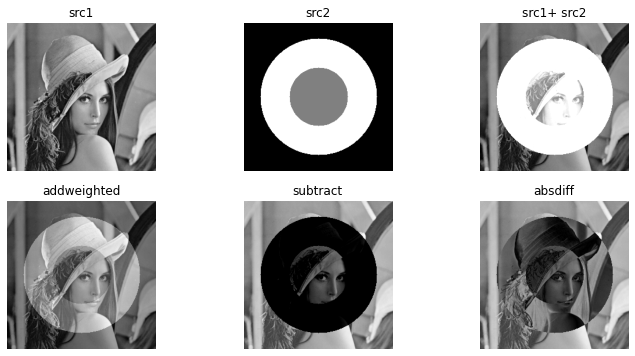

In [15]:
src1 = cv2.imread('./computer_vision/fig/fig/lenna256.bmp', 0)
src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 100, 200,-1)
cv2.circle(src2, (128,128), 50, 100,-1)

dst1 = cv2.add(src1,src2)
dst2 = cv2.addWeighted(src1, 0.7, src2, 0.3, 0)
dst3 = cv2.subtract(src1,src2)
dst4 = cv2.absdiff(src1,src2)

plt.figure(figsize = (12,6))
plt.subplot(231), plt.imshow(src1, cmap = 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap = 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap = 'gray'), plt.axis('off'), plt.title('src1+ src2')
plt.subplot(234), plt.imshow(dst2, cmap = 'gray'), plt.axis('off'), plt.title('addweighted')
plt.subplot(235), plt.imshow(dst3, cmap = 'gray'), plt.axis('off'), plt.title('subtract')
plt.subplot(236), plt.imshow(dst4, cmap = 'gray'), plt.axis('off'), plt.title('absdiff')
plt.show()

cv2.imshow('src1',src1)
cv2.imshow('src2',src2)

cv2.waitKey()
cv2.destroyAllWindows()

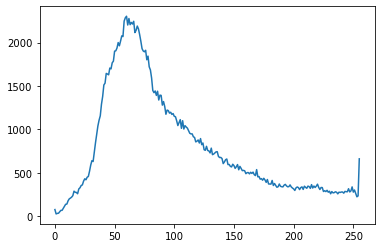

In [17]:
src = cv2.imread('./computer_vision/fig/fig/flowers.jpg',0)

hist = cv2.calcHist([src], [0], None, [256], [0,256])

cv2.imshow('src', src)

plt.plot(hist)
plt.show()


cv2.waitKey()
cv2.destroyAllWindows()

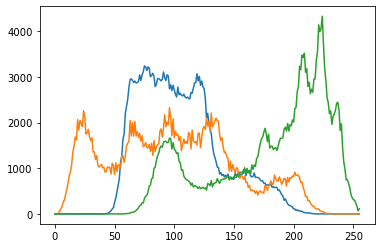

In [20]:
src = cv2.imread('./computer_vision/fig/fig/lenna.bmp')

hist_b = cv2.calcHist([src], [0], None, [256], [0,256])
hist_g = cv2.calcHist([src], [1], None, [256], [0,256])
hist_r = cv2.calcHist([src], [2], None, [256], [0,256])

cv2.imshow('src', src)

plt.plot(hist_b)
plt.plot(hist_g)
plt.plot(hist_r)

plt.show()


cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
src = cv2.imread('./computer_vision/fig/green/puppy_shrink.png',0)

src_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
src_equal = cv2.equalizeHist(src)


cv2.imshow('src',src)
cv2.imshow('src_norm',src_norm)
cv2.imshow('src_equal',src_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
src = cv2.imread('./computer_vision/fig/green/spring_in_park.jpg',cv2.IMREAD_REDUCED_COLOR_2)


src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0,255, cv2.NORM_MINMAX)
v_equal = cv2.equalizeHist(v)

src_norm = cv2.merge((h,s,v_norm))
src_equal = cv2.merge((h,s,v_equal))

src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)
src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)

cv2.imshow('src',src)
cv2.imshow('src_norm',src_norm)
cv2.imshow('src_equal',src_equal)


cv2.waitKey()
cv2.destroyAllWindows()

In [45]:
src = cv2.imread('./computer_vision/fig/green/palette.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst_bgr = cv2.inRange(src, (200,0,0), (255,100, 50))
dst_hsv = cv2.inRange(src_hsv, (110,230,200), (120, 255, 255))

cv2.imshow('src',src)
cv2.imshow('dst_bgr',dst_bgr)
cv2.imshow('dst_hsv',dst_hsv)



cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'src')
    hmax = cv2.getTrackbarPos('h_max', 'src')
    dst = cv2.inRange(src_hsv,(hmin,150,0), (hmax, 255,255))
    cv2.imshow('src', dst)


src = cv2.imread('./computer_vision/fig/green/palette.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)


cv2.namedWindow('src')
cv2.createTrackbar('h_min', 'src', 50,179, call_track)
cv2.createTrackbar('h_max', 'src', 80,179, call_track)



cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [ ]:
-------- review---------

In [3]:
src = cv2.imread('./computer_vision/fig/fig/green.png', cv2.IMREAD_REDUCED_COLOR_2)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

x,y,w,h = cv2.selectROI(src)
print(x,y,w,h)

crop = src_ycrcb[y:y+h, x:x+w]

channels = [1,2]
histsize = [256,256]
ranges = [0,256,0,256]

hist = cv2.calcHist([crop], channels, None, histsize, ranges)

# calcBackProject(images, channels, hist, ranges, scale[, dst]) -> dst
backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

dst = cv2.copyTo(src, backproj)


cv2.imshow('src',src)
cv2.imshow('crop', crop)
cv2.imshow('backproj', backproj)
cv2.imshow('dst',dst)


cv2.waitKey()
cv2.destroyAllWindows()

51 19 659 287


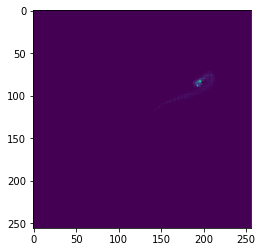

In [10]:
plt.imshow(hist)
plt.show()

In [18]:
src = cv2.imread('./computer_vision/fig/green/autumn.jpg', cv2.IMREAD_REDUCED_COLOR_4)


src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

x,y,w,h = cv2.selectROI(src)
print(x,y,w,h)
# crop_src = src[y:y+h, x:x+w]
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1,2]
histsize = [256,256]
ranges = [0,256,0,256]

hist = cv2.calcHist([crop], channels, None, histsize, ranges)
backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

dst = cv2.copyTo(src, backproj)


cv2.imshow('src',src)
# cv2.imshow('crop_src',crop_src)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)



cv2.waitKey()
cv2.destroyAllWindows()

422 524 355 181


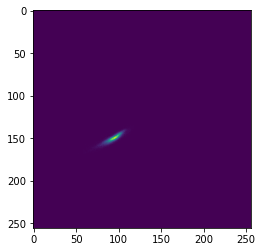

In [8]:
plt.imshow(hist)
plt.show()

In [20]:
## 평균필터
src = cv2.imread('./computer_vision/fig/green/blue_eyes.png')

kernel_3 = np.ones((3,3), np.float32)/9.
kernel_5 = np.ones((5,5), np.float32)/25.

# filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
# src : 입력영상
# ddepth : 출력영상의 타입(cv2.CV_8U, cv2.CV_32F, cv2.CV_64F),
#         -1 => 입력영상과 같은 타임
# kernel : filter행렬, 실수형
# anchor : (-1,-1) 필터의 중앙점
#delta : 더할 값
#borderType : 가장자리 픽셀 확장방식
# dst : 출력영상

dst_3 = cv2.filter2D(src, -1, kernel_3, -1)
dst_5 = cv2.filter2D(src, -1, kernel_5, -1)

# blur(src, ksize[, dst[, anchor[, borderType]]]) -> dst
# src : 입력영상
# ksize : mean filter kernel size

dst_3_blur = cv2.blur(src, (3,3))
dst_5_blur = cv2.blur(src, (5,5))



cv2.imshow('src', src)
cv2.imshow('dst_3', dst_3)
cv2.imshow('dst_5', dst_5)
cv2.imshow('dst_3_blur', dst_3_blur)
cv2.imshow('dst_5_blur', dst_5_blur)

cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
src = cv2.imread('./computer_vision/fig/green/blue_eyes.png')

cv2.imshow('src', src)

for ksize in (3,5,7,9):
    dst = cv2.blur(src, (ksize,ksize))
    
    text = '{} x {}'.format(ksize,ksize)
    cv2.putText(dst, text, (30,30), cv2.FONT_HERSHEY_COMPLEX,
               1, (0,0,255), 3, cv2.LINE_AA)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    
# cv2.waitKey()
cv2.destroyAllWindows()    

In [53]:
src = cv2.imread('./computer_vision/fig/green/blue_eyes.png')

# dst_blur = cv2.blur(src, (5,5))


# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
# src : 입력영상
# ksize : eman filter kernel size, (0,0) 으로 자동으로 결정
# sigmaX:  gaussian x 방향의 sigma
# sigmaY:  gaussian y 방향의 sigma

dst_Gaussian = cv2.GaussianBlur(src, (0,0),3)
dst_blur = cv2.blur(src, (7,7))

cv2.imshow('src', src)
# cv2.imshow('dst_blur', dst_blur)
cv2.imshow('dst_Gaussian', dst_Gaussian)


cv2.waitKey()
cv2.destroyAllWindows()  

In [60]:
src = cv2.imread('./computer_vision/fig/green/blue_eyes.png', cv2.IMREAD_GRAYSCALE)
print(src.shape)


salt_pepper_noise1 = np.random.choice((0,255),src.shape, p = (0.99, 0.01))
salt_pepper_noise2 = np.random.choice((0,255),src.shape, p = (0.99, 0.01))
src_noise = src + salt_pepper_noise1 - salt_pepper_noise2
src_noise = np.clip(src_noise, 0,255).astype(np.uint8)
print(src_noise.dtype)


##medianBlur(src, ksize[, dst]) -> dst
# src : 입력 영상
# ksize : median filter kernel size

dst = cv2.medianBlur(src_noise, 3)

cv2.imshow('src', src)
cv2.imshow('src_noise', src_noise)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()  

(553, 840)
uint8


In [66]:
src = cv2.imread('./computer_vision/fig/green/blue_eyes.png', cv2.IMREAD_GRAYSCALE)
# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
dst_Gaussian = cv2.GaussianBlur(src, (0,0), 5.0) 


# bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
# src: 입력영상
# d: -1로 설정
# sigmaColor: 색공간의 표준편차
# sigmaSpace: 좌표공간의표준편차
# dst:
# borderType: 가장자리 픽셀확장 방식
dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5.0)

cv2.imshow('src', src)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)

cv2.waitKey()
cv2.destroyAllWindows()

In [55]:
src = cv2.imread('./computer_vision/fig/fig/lenna256.bmp')

kernel_3 = np.ones((3,3), np.float32)/9.
kernel_5 = np.ones((5,5), np.float32)/25.


dst_3_blur = cv2.blur(src, (3,3))
dst_5_blur = cv2.blur(src, (5,5))

dst_Gaussian = cv2.GaussianBlur(src, (0,0),3)
dst_medianBlur = cv2.medianBlur(src, 9)
dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5.0)

cv2.imshow('src', src)
# cv2.imshow('dst_3_blur', dst_3_blur)
# cv2.imshow('dst_5_blur', dst_5_blur)
cv2.imshow('dst_medianBlur', dst_medianBlur)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)



cv2.waitKey()
cv2.destroyAllWindows()

In [82]:
src = cv2.imread('./computer_vision/fig/green/son.jpg')

src_Gaussian = cv2.GaussianBlur(src, (0,0),2)

edge = 255-cv2.Canny(src, 100,200)
edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(src_Gaussian, edge)


cv2.imshow('src', src)
cv2.imshow('src_Gaussian', src_Gaussian)
cv2.imshow('edge', edge)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [87]:
src = cv2.imread('./computer_vision/fig/green/son.jpg', 0)

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0, delta = 128)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1, delta = 128)
# mag = np.clip(cv2.magnitude(dx, dy),0, 255).astype(np.uint8)
# _, thres = cv2.threshold(mag, 230,255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('dx', dx) # cv2.CV 대신 -1
cv2.imshow('dy', dy) # cv2.CV 대신 -1
# cv2.imshow('mag', mag)
# cv2.imshow('thres', thres)

cv2.waitKey()
cv2.destroyAllWindows()

In [105]:
src = cv2.imread('./computer_vision/fig/green/son.jpg')

time = cv2.TickMeter()
time.start()



src_Gaussian = cv2.GaussianBlur(src, (0,0),2)

edge = 255-cv2.Canny(src, 100,200)
edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(src_Gaussian, edge)


time.stop()
print(time.getTimeMilli(), 'ms')

time.reset()

cv2.imshow('src', src)
cv2.imshow('src_Gaussian', src_Gaussian)
cv2.imshow('edge', edge)
cv2.imshow('dst', dst)



cv2.waitKey()
cv2.destroyAllWindows()

6.244000000000001 ms


In [132]:
##wqrpAffine

src = cv2.imread('./computer_vision/fig/green/puppy.bmp')
print(src.shape)
M = np.array([[1,0,0],
            [0.2,1,0]],dtype = np.float32)

# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
# M : affine transform matrix (size : 2 x 3)

dst = cv2.warpAffine(src, M, (640,608))
cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

(480, 640, 3)


In [119]:
# 회전
src = cv2.imread('./computer_vision/fig/green/puppy.bmp')


# rad = 20*np.pi/180
# M = np.array([[np.cos(rad), np.sin(rad), 0],
#              [-np.sin(rad), np.cos(rad), 0]], dtype = np.float32)

h,w = src.shape[:2]
cp= (w/2,h/2)

# getRotationMatrix2D(center, angle, scale) -> retval

M = cv2.getRotationMatrix2D(cp, 20, 1)

dst = cv2.warpAffine(src, M, (0,0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [114]:
src = cv2.imread('./computer_vision/fig/green/rose.jpg')

dst1 = cv2.resize(src, (1920,1280), interpolation = cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920,1280), interpolation = cv2.INTER_LINEAR)
dst3 = cv2.resize(src, (1920,1280), interpolation = cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920,1280), interpolation = cv2.INTER_LANCZOS4)



cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)


cv2.waitKey()
cv2.destroyAllWindows()

In [139]:
src = cv2.imread('./computer_vision/fig/green/checkerboard.png')

h,w = src.shape[:2]
# print(h,w)

src_point = np.array([[217,50],[691,47],[830,517],[67,526]], dtype = np.float32)
dst_point = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]], dtype = np.float32)


pers = cv2.getPerspectiveTransform(src_point, dst_point)
# warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
dst = cv2.warpPerspective(src, pers, (w,h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [140]:
def mouse_call(event, x,y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('left button down = {}, {}'.format(x,y))
        
        
src = cv2.imread('./computer_vision/fig/green/checkerboard.png')

h,w = src.shape[:2]
# print(h,w)

src_point = np.array([[217,50],[691,47],[830,517],[67,526]], dtype = np.float32)
dst_point = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]], dtype = np.float32)


pers = cv2.getPerspectiveTransform(src_point, dst_point)
# warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
dst = cv2.warpPerspective(src, pers, (w,h))

cv2.imshow('src', src)
cv2.setMouseCallback('src', mouse_call, src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

left button down = 216, 51
left button down = 690, 45
left button down = 69, 529
left button down = 831, 519


In [138]:
src = cv2.imread('./computer_vision/fig/green/bamboo.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

h, w = src.shape[:2]

map2, map1 = np.indices((h, w), dtype=np.float32)
print(map2)
print(map2.shape)
map1 = map1 + 10 * np.sin(map2/32)

print(np.sin(map2/32))
dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [597. 597. 597. ... 597. 597. 597.]
 [598. 598. 598. ... 598. 598. 598.]
 [599. 599. 599. ... 599. 599. 599.]]
(600, 498)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.03124491  0.03124491  0.03124491 ...  0.03124491  0.03124491
   0.03124491]
 [ 0.06245932  0.06245932  0.06245932 ...  0.06245932  0.06245932
   0.06245932]
 ...
 [-0.19210428 -0.19210428 -0.19210428 ... -0.19210428 -0.19210428
  -0.19210428]
 [-0.16134752 -0.16134752 -0.16134752 ... -0.16134752 -0.16134752
  -0.16134752]
 [-0.13043322 -0.13043322 -0.13043322 ... -0.13043322 -0.13043322
  -0.13043322]]
